In [8]:
%run observables.py

In [10]:
%%time
H_inf = 2e12
f_a = 3e14
Gamma_inf_list = np.geomspace(1e6, 1e9, 11)
m_a_list = np.geomspace(1e6, 1e9, 10)
def f(Gamma_inf, m_a, i, j):
    n = i + j * len(m_a_list) + 1
    print("step:", n, "of", len(Gamma_inf_list) * len(m_a_list), end="")
    start = time.time()
    x = compute_observables(H_inf, Gamma_inf, (m_a,), f_a, axion_motion.realignment_axion_field, (1, 0),
                            calc_init_time=True)
    end = time.time()
    print(" done (%f seconds)" % (end - start))
    return x
obs = np.array([[f(Gamma_inf, m_a, i, j) 
                 for i, m_a in enumerate(m_a_list)] for j, Gamma_inf in enumerate(Gamma_inf_list)])

step: 1 of 110

/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:56: RuntimeWarning: invalid value encountered in power
  T = T_const * rho_rad**(1/4)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:57: RuntimeWarning: invalid value encountered in sqrt
  H = H_const * np.sqrt(rho_rad + rho_field)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:13: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(rho_field + rho_rad) * C # NOTE: sometimes with is evalulated at weird arguments -> warnings


 done (3.247440 seconds)
step: 2 of 110 done (3.971366 seconds)
step: 3 of 110 done (4.296248 seconds)
step: 4 of 110 done (4.567102 seconds)
step: 5 of 110

/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:56: RuntimeWarning: invalid value encountered in double_scalars
  T = T_const * rho_rad**(1/4)


 done (5.505973 seconds)
step: 6 of 110 done (6.953929 seconds)
step: 7 of 110 done (10.352855 seconds)
step: 8 of 110 done (14.367857 seconds)
step: 9 of 110 done (20.091452 seconds)
step: 10 of 110 done (23.612421 seconds)
step: 11 of 110 done (2.588283 seconds)
step: 12 of 110 done (3.317340 seconds)
step: 13 of 110 done (3.603472 seconds)
step: 14 of 110 done (4.022568 seconds)
step: 15 of 110 done (4.745105 seconds)
step: 16 of 110 done (5.366505 seconds)
step: 17 of 110 done (7.018946 seconds)
step: 18 of 110 done (9.626044 seconds)
step: 19 of 110 done (14.972836 seconds)
step: 20 of 110 done (19.972005 seconds)
step: 21 of 110 done (2.809574 seconds)
step: 22 of 110 done (2.863788 seconds)
step: 23 of 110 done (3.395999 seconds)
step: 24 of 110 done (4.183553 seconds)
step: 25 of 110 done (4.418458 seconds)
step: 26 of 110 done (4.748058 seconds)
step: 27 of 110 done (5.312012 seconds)
step: 28 of 110 done (7.053849 seconds)
step: 29 of 110 done (9.642626 seconds)
step: 30 of 1

Text(0, 0.5, '$\\Gamma_\\mathrm{inf}$ / GeV')

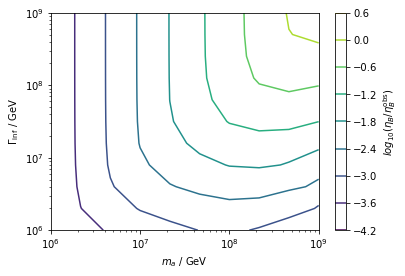

In [13]:
eta = obs[:,:,0] * obs[:,:,1]
plt.contour(m_a_list, Gamma_inf_list, np.log10(eta / eta_B_observed))
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label=r"$log_{10}(\eta_B / \eta_B^\mathrm{obs})$")
plt.xlabel("$m_a$ / GeV")
plt.ylabel(r"$\Gamma_\mathrm{inf}$ / GeV")

step = 1
calculcated initial integration time:
tmax_inf_time = 3559.41097424853 tmax_axion_time = 3559.41097424853
rh: 0.17782258987426758
axion: 14.064236879348755
transport eq.: 14.818467855453491
change by timescale: 1.0316707623648565e-05 vs 0.001
B-L range: -5.524261588480276e-07 0.0
delta = 1.492254536416879 rtol_asym = 0.001
step = 2
rh: 0.0001862049102783203
axion: 0.029132366180419922
transport eq.: 0.07679128646850586
change by timescale: 9.783398890710746e-06 vs 0.001
B-L range: -3.7704065327201164e-07 -3.7699417973445275e-07
delta = 0.00012326334094829607 rtol_asym = 0.001
axion decay took: 0.14658784866333008 seconds


/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:13: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(rho_field + rho_rad) * C # NOTE: sometimes with is evalulated at weird arguments -> warnings


(3.285466449888227e-09, 0.8694572249692663, 0.0, 1.0)

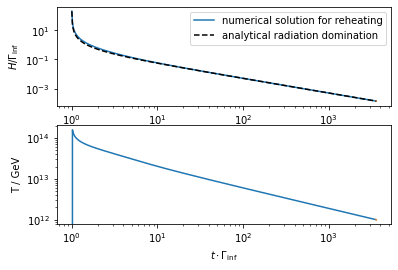

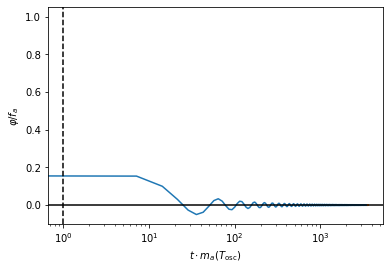

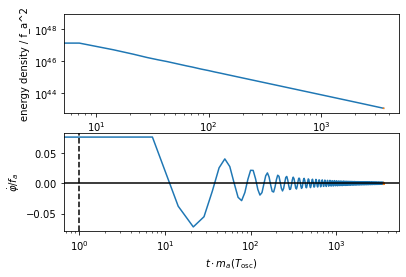

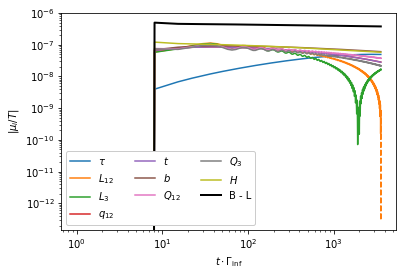

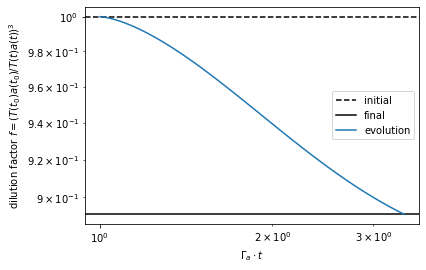

In [1]:
%run observables.py
H_inf = 2e12
f_a = 3e14
Gamma_inf = 1e10
m_a = 1e10
compute_observables(H_inf, Gamma_inf, (m_a,), f_a, axion_motion.realignment_axion_field, (1.0, 0.0),
                    calc_init_time=True, debug=True)